# Objective

The task is to predict whether a client of a bank will subscribe to a term deposit based on phone-based marketing campaigns. The dataset includes demographic information, previous marketing interactions, and behavioral attributes. The goal is to build a model that can accurately classify clients as subscribers or non-subscribers.

# Data Definition

**Age:** Age of the customer

**Job:** Type of job of customer

**Marital:** Marital status of the customer

**Education:** The education level of the customer

**Default:** Has credit in default?

**Balance:** Average yearly balance (in Euros)

**Housing:** Has a housing loan?

**Loan:** Has a personal loan?

**Contact:** Contact communication type

**Day:** Last contact day of the month

**Month:** Last contact month of the year

**Duration:** Last contact duration, in seconds

**Campaign:** Number of contacts performed during this campaign and for this client

**Pdays:** Number of days that passed by after the client was last contacted from a previous campaign (-1 means the client was not previously contacted)

**Previous:** Number of contacts performed before this campaign and for this client

**Poutcome:** Outcome of the previous marketing campaign

# Table of Contents

1. **[Importing Important Libraries](#import_lib)**
2. **[Loading Dataset](#load_data)**
3. **[Observation of the dataset](#observation)**
4. **[Descriptive Analysis](#descriptive_analysis)**
    - 4.1 **[Numerical variables](#num_var)**
    - 4.2 **[Categorical variables](#cat_var)**
5. **[Discovering Outliers](#outliers)**
    - 5.1 **[Selecting continuous numeric variables](#outliers_bifurcate)**
    - 5.2 **[Plotting boxplot for numerical data](#outliers_boxplot)**
    - 5.3 **[Removing outliers using IQR method](#remove_outliers)**
6. **[Checking correlation between variables](#correlation)**
7. **[Checking count](#count)**
    - 7.1 **[Categorical Features](#count_cat)**
        - 7.1.1 **[Plotting bar graph for categorical count](#count_cat_plot)**
        - 7.1.2 **[Relationship of Categorical Features with Label](#count_cat_label)**
    - 7.2 **[Numerical Features](#count_num)**
        - 7.2.1 **[Plotting dist graph for numerical count](#count_num_plot)**
        - 7.2.2 **[Relationship of Numerical Features with Label](#count_num_label)**
    - 7.3 **[Label (y)](#label)**
8. **[Age analysis](#age_analysis)**
9. **[Encoding](#encoding)**
10. **[Scaling Dataset](#scaling_dataset)**
11. **[Splitting Train and Test Data](#train_test_split)**
12. **[Fitting Classification Models](#fit_models)**
    - 12.1 **[KNN](#fit_model_knn)**
        - 12.1.1 **[Confusion matrix for train data](#knn_cm_train)**
        - 12.1.2 **[Confusion matrix for test data](#knn_cm_test)**
    - 12.2 **[Logistic Regression](#fit_model_log_reg)**
        - 12.2.1 **[Confusion matrix for train data](#log_reg_cm_train)**
        - 12.2.2 **[Confusion matrix for test data](#log_reg_cm_test)**
    - 12.3 **[Decision Tree](#fit_model_dec_tree)**
        - 12.3.1 **[Confusion matrix for train data](#dec_tree_cm_train)**
        - 12.3.2 **[Confusion matrix for test data](#dec_tree_cm_test)**
13. **[AUC scores](#auc)**
14. **[ROC curve for models](#roc)**
15. **[Cross Validation](#cv)**
    - 15.1 **[Logistic Regression](#cv_log_reg)**
    - 15.2 **[Decision tree](#cv_dec_tree)**
16. **[Feature selection](#feat_select)**
    - 16.1 **[Logistic Regression](#feat_select_log_reg)**
    - 16.2 **[Decision tree](#feat_select_dec_tree)**
17. **[Inference](#inference)**

<a id='import_lib'></a>
# 1. Importing Important Libraries

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

from mlxtend.feature_selection import SequentialFeatureSelector

<a id='load_data'></a>
# 2. Loading Dataset

In [258]:
df = pd.read_csv("train.csv")

<a id='observation'></a>
# 3. Observation of the dataset

In [259]:
# Displaying the first 5 rows rows in the dataset

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0


In [260]:
df.shape

(21000, 17)

**Observation:**

We can see that there are 21000 rows and 17 columns.

In [261]:
# Displaying the names of the columns in a dataset

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y_bool'],
      dtype='object')

In [262]:
# Displaying information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        21000 non-null  int64 
 1   job        21000 non-null  object
 2   marital    21000 non-null  object
 3   education  21000 non-null  object
 4   default    21000 non-null  object
 5   balance    21000 non-null  int64 
 6   housing    21000 non-null  object
 7   loan       21000 non-null  object
 8   contact    21000 non-null  object
 9   day        21000 non-null  int64 
 10  month      21000 non-null  object
 11  duration   21000 non-null  int64 
 12  campaign   21000 non-null  int64 
 13  pdays      21000 non-null  int64 
 14  previous   21000 non-null  int64 
 15  poutcome   21000 non-null  object
 16  y_bool     21000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 2.7+ MB


**Observation:**

***Categorical data:*** job, marital, education, default, housing, loan, contact, month, poutcome

***Numerical data:*** age, balance, day, duration, campaign, pdays, previous, y_bool

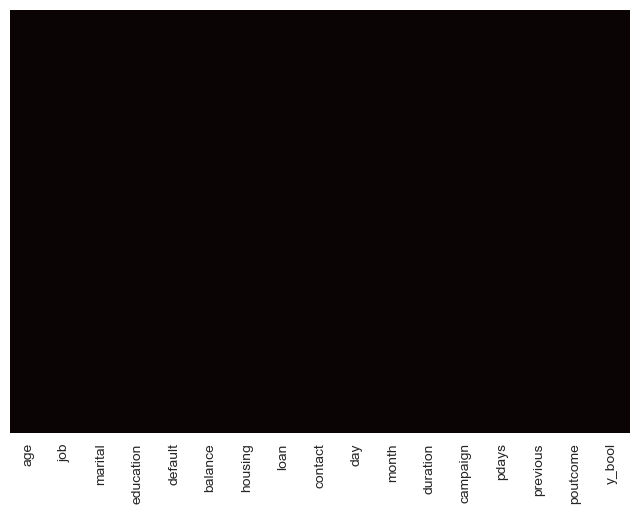

In [263]:
# Plotting missing data

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'mako');

In [264]:
# Displaying missing data

Total = df.isnull().sum().sort_values(ascending=False)
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
age,0,0.0
day,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
contact,0,0.0
job,0,0.0


**Observation:**

Data has no missing values.

In [265]:
# Checking for duplicate values

df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool


**Observation:**

There are no duplicate values in our dataset.

In [266]:
for i in df.columns:
    print(f'{i} : ', df[i].unique(), '\n')

age :  [51 55 65 25 36 52 22 31 30 57 29 42 39 34 28 60 21 37 35 27 48 53 54 47
 41 44 50 38 43 24 26 56 33 23 32 40 58 46 62 19 20 49 45 61 59 71 77 68
 66 70 87 63 82 69 74 80 67 73 81 75 64 76 85 78 84 83 72 86] 

job :  ['admin.' 'blue-collar' 'services' 'self-employed' 'technician'
 'management' 'unknown' 'unemployed' 'retired' 'housemaid' 'entrepreneur'
 'student'] 

marital :  ['married' 'divorced' 'single'] 

education :  ['tertiary' 'secondary' 'primary' 'unknown'] 

default :  ['no' 'yes'] 

balance :  [  148  7160  2197 ... 13245  -733  -922] 

housing :  ['no' 'yes'] 

loan :  ['no' 'yes'] 

contact :  ['cellular' 'unknown' 'telephone'] 

day :  [15  4 12 16 19 11  5 13 18 22  1 29  3 31 14 17 10 20  2  6  7 27  8  9
 28 21 23 24 30 26 25] 

month :  ['apr' 'may' 'feb' 'sep' 'jun' 'nov' 'jul' 'mar' 'oct' 'aug' 'jan' 'dec'] 

duration :  [ 263  315  102 ... 1174  771 1711] 

campaign :  [ 2  1  4 10  7  3  6  5  8 16 12  9 13 23 15 11 17 22 27 14 21 25 20 18
 19 28] 

pdays 

<a id='descriptive_analysis'></a>
# 4. Descriptive Analysis

<a id='num_var'></a>
## 4.1 Numerical variables

In [267]:
# describing the numerical data

df.describe()

,age,balance,day,duration,campaign,pdays,previous,y_bool
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,36.997952,1607.497810,11.056571,264.085048,2.013381,3.231952,0.102524,0.269095
std,10.484725,2991.187132,7.450415,288.163812,1.575916,23.161489,0.664355,0.443500
min,19.000000,-2072.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,29.000000,299.000000,5.000000,94.000000,1.000000,-1.000000,0.000000,0.000000
50%,35.000000,633.000000,10.000000,184.000000,2.000000,-1.000000,0.000000,0.000000
75%,45.000000,1875.000000,16.000000,319.000000,2.000000,-1.000000,0.000000,1.000000
max,87.000000,71188.000000,31.000000,2703.000000,28.000000,437.000000,14.000000,1.000000


<a id='cat_var'></a>
## 4.2 Categorical variables

In [268]:
# Describing the categorical data

df.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,poutcome
count,21000,21000,21000,21000,21000,21000,21000,21000,21000
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,jul,unknown
freq,4947,13412,10663,19994,11263,16215,13172,5011,16125


<a id='outliers'></a>
# 5. Discovering Outliers

<a id='outliers_bifurcate'></a>
## 5.1 Selecting continuous numeric variables

In [269]:
df_num = df[['balance','duration']]

In [270]:
df_num

,balance,duration
0,148,263
1,7160,315
2,2197,102
3,6658,197
4,1761,177
...,...,...
20995,289,102
20996,122,301
20997,521,140
20998,2092,7


<a id='outliers_boxplot'></a>
## 5.2 Plotting boxplot for numerical data

#### Setting the plot size

In [271]:
plt.rcParams['figure.figsize'] = (5,5)

#### Creating a boxplot for `balance` column

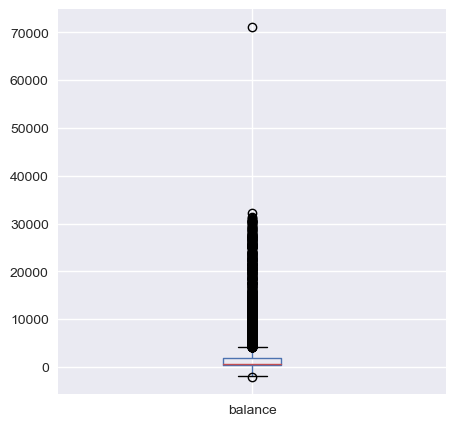

In [272]:
df_num.boxplot(column=['balance'])
plt.show()

#### Creating a boxplot for `duration` column

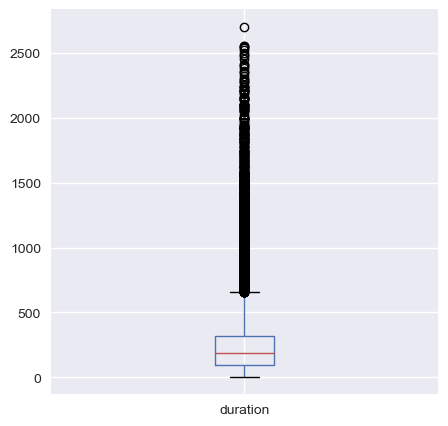

In [273]:
df_num.boxplot(column=['duration'])
plt.show()

**Observations:**

From the above plots, we notice that for all the variables there are points above the upper extreme. These points are outliers.

<a id='remove_outliers'></a>
## 5.3 Removing outliers using IQR method

#### Calculating interquartile range 

In [274]:
Q1 = df_num.quantile(0.25)

In [275]:
Q3 = df_num.quantile(0.75)

In [276]:
# calculate of interquartile range 
IQR = Q3 - Q1

In [277]:
# print the IQR values for numeric variables
print(IQR)

balance     1576.0
duration     225.0
dtype: float64


#### Filtering out the outlier values

In [278]:
df_num= df_num[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

#### Checking the shape of data

In [279]:
df_num.shape

(17982, 2)

#### Merging above data with our dataframe

In [280]:
df = df.merge(df_num)

In [281]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0
1,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0
2,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0
3,52,self-employed,single,tertiary,no,1887,yes,yes,unknown,19,jun,56,1,-1,0,unknown,1
4,22,admin.,single,secondary,no,2456,yes,yes,cellular,16,may,539,4,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,26,technician,married,secondary,no,289,no,no,cellular,8,jul,102,3,-1,0,unknown,1
18364,34,management,married,tertiary,no,122,yes,no,cellular,19,may,301,2,-1,0,unknown,0
18365,32,blue-collar,married,tertiary,yes,521,no,yes,telephone,2,oct,140,3,-1,0,unknown,0
18366,40,technician,married,secondary,no,2092,no,no,cellular,3,aug,7,2,-1,0,unknown,0


#### Checking the shape of data after merging

In [282]:
df.shape

(18368, 17)

<a id='correlation'></a>
# 6. Checking correlation between variables

In [283]:
# calculate the correlation between the variables
corr = df.corr()

# print cor-realtion matrix
corr

,age,balance,day,duration,campaign,pdays,previous,y_bool
age,1.000000,0.018358,-0.003500,0.001254,-0.002438,-0.007514,0.007581,-0.051419
balance,0.018358,1.000000,-0.011214,0.050991,-0.007035,0.005838,0.009410,-0.018975
day,-0.003500,-0.011214,1.000000,-0.002164,-0.000236,-0.006928,0.002281,-0.013700
duration,0.001254,0.050991,-0.002164,1.000000,-0.008357,0.008152,-0.007389,-0.006680
campaign,-0.002438,-0.007035,-0.000236,-0.008357,1.000000,0.005350,-0.003799,0.023237
pdays,-0.007514,0.005838,-0.006928,0.008152,0.005350,1.000000,0.003666,-0.008684
previous,0.007581,0.009410,0.002281,-0.007389,-0.003799,0.003666,1.000000,-0.006139
y_bool,-0.051419,-0.018975,-0.013700,-0.006680,0.023237,-0.008684,-0.006139,1.000000


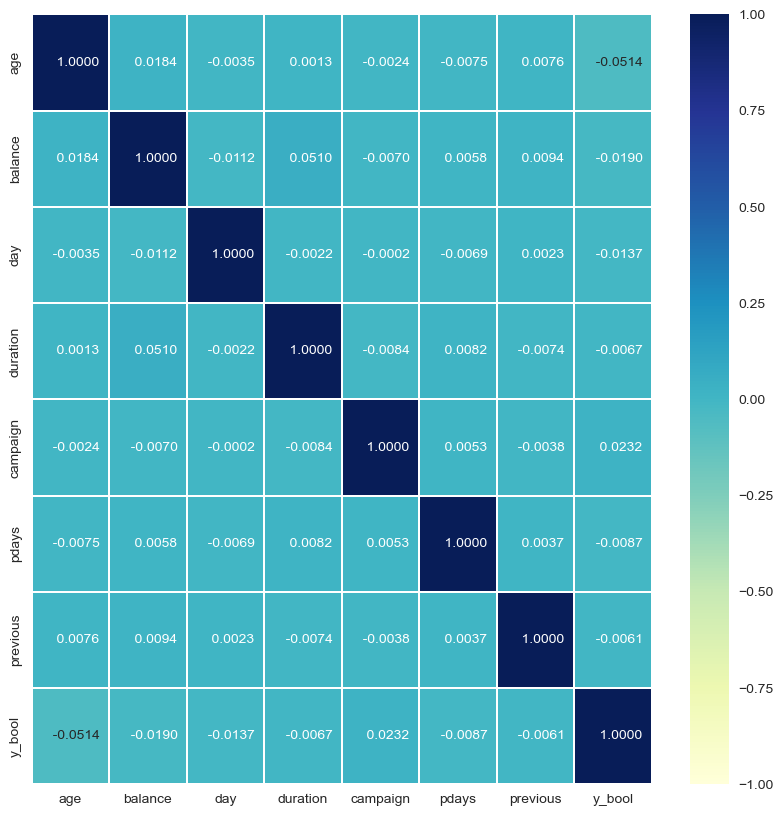

In [284]:
# set the plot size
fig,ax = plt.subplots(figsize=(10, 10))

# plot a heatmap for the correlation matrix
# annot: print values in each cell
# linewidths: specify width of the line specifying the plot
# vmin: minimum value of the variable
# vmax: maximum value of the variable
# cmap: colour code of the plot
# fmt: set the decimal place of annot
sns.heatmap(corr, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')

# display the plot
plt.show()

**Observation:**

Data is not highly correlated to each other

<a id='count'></a>
# 7. Checking count

<a id='count_cat'></a>
## 7.1 Categorical Features

In [285]:
df_cat = df[['job','marital','education','default','housing','loan','contact','month','poutcome']]

<a id='count_cat_plot'></a>
### 7.1.1 Plotting bar graph for categorical count

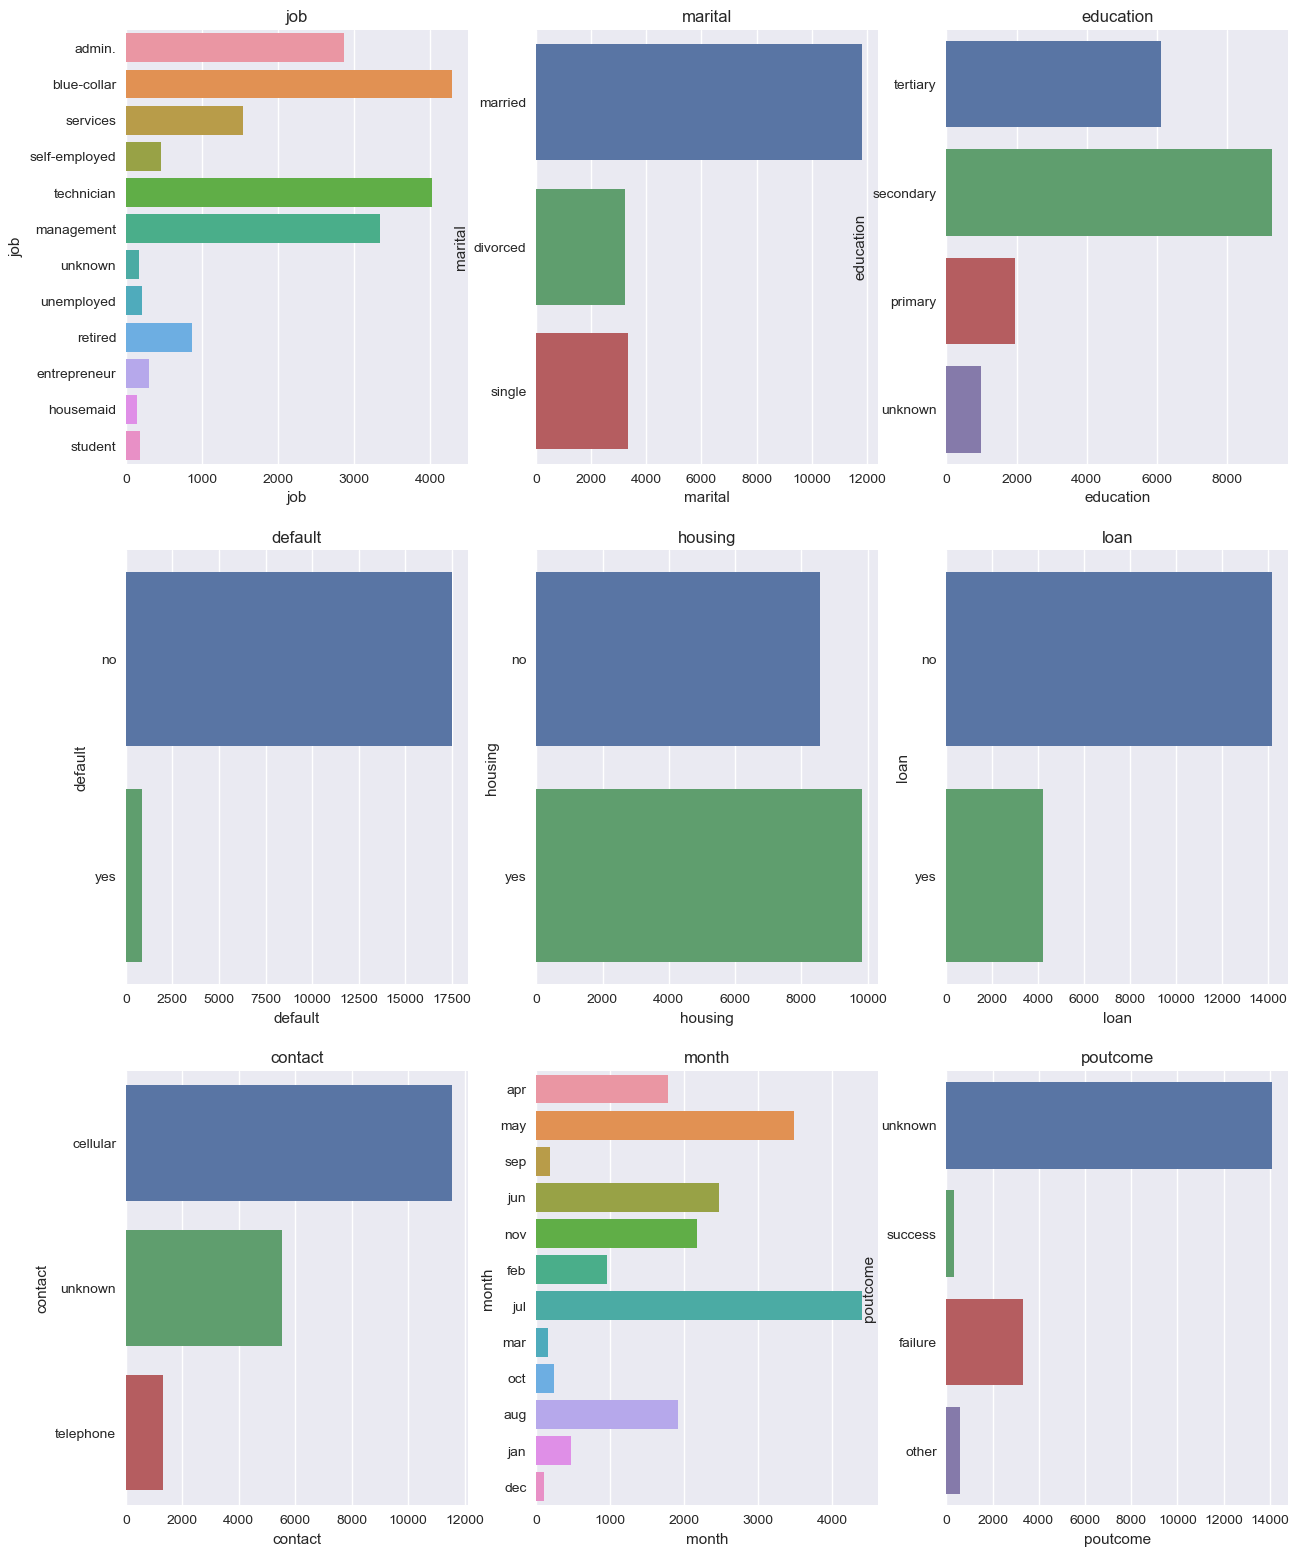

In [286]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in df_cat:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

**Inferences:**

People with blue collar job, technician and management are more compared to others.<br>
People with tertiary and secondary education contacted are more.
Their are more married people.<br>
Majority of people are Non Defaulters.<br>
Number of people having Housing loan are more compared to personal Loan.<br>
Cellular contacts are more.<br>
Maximum people contacted are in month of july.<br>

<a id='count_cat_label'></a>
### 7.1.2 Relationship of Categorical Features with Label

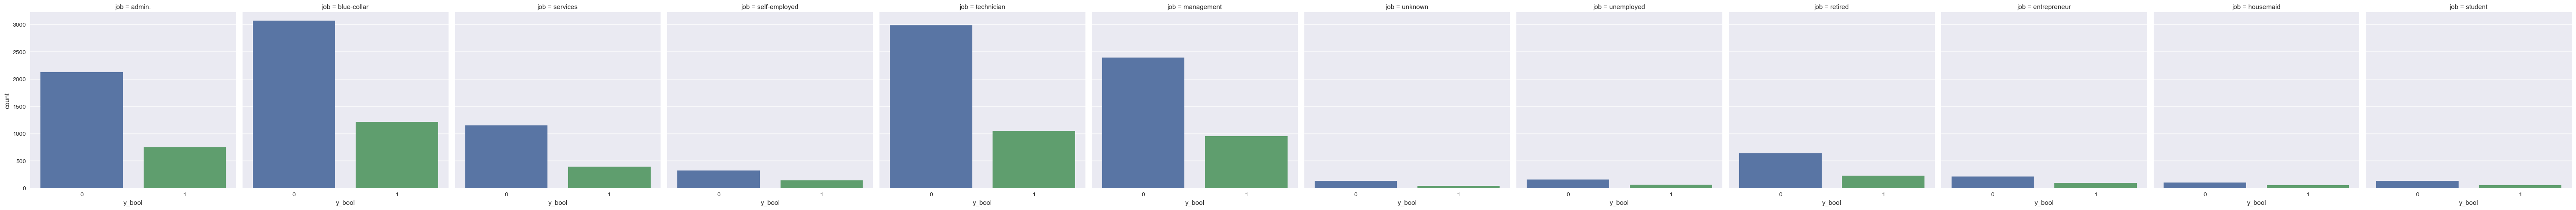

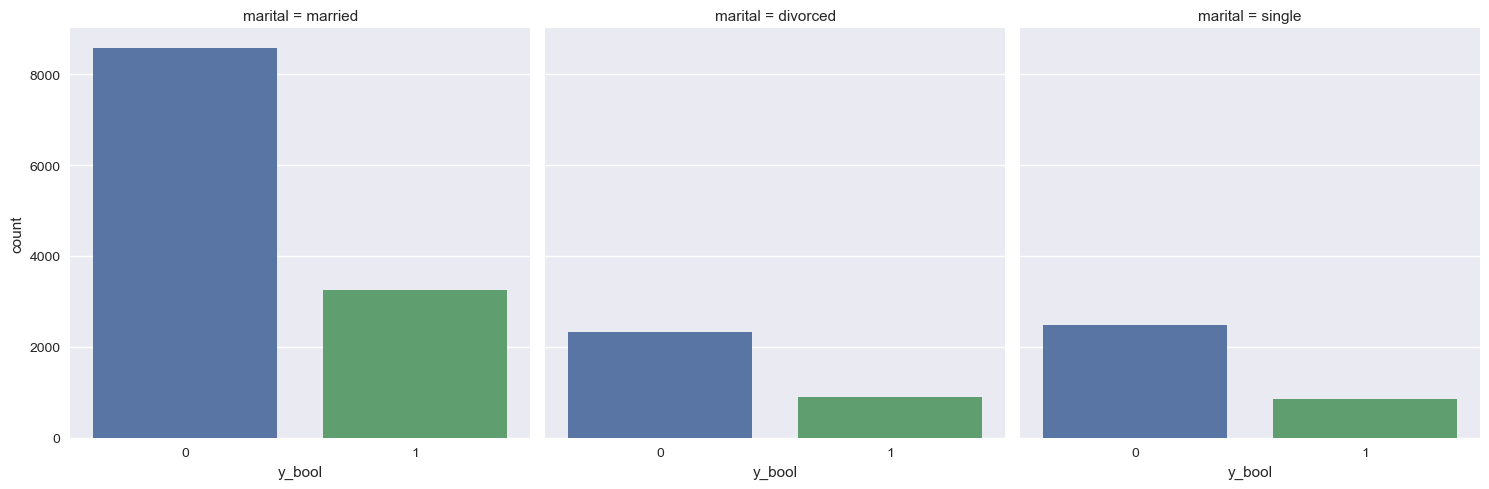

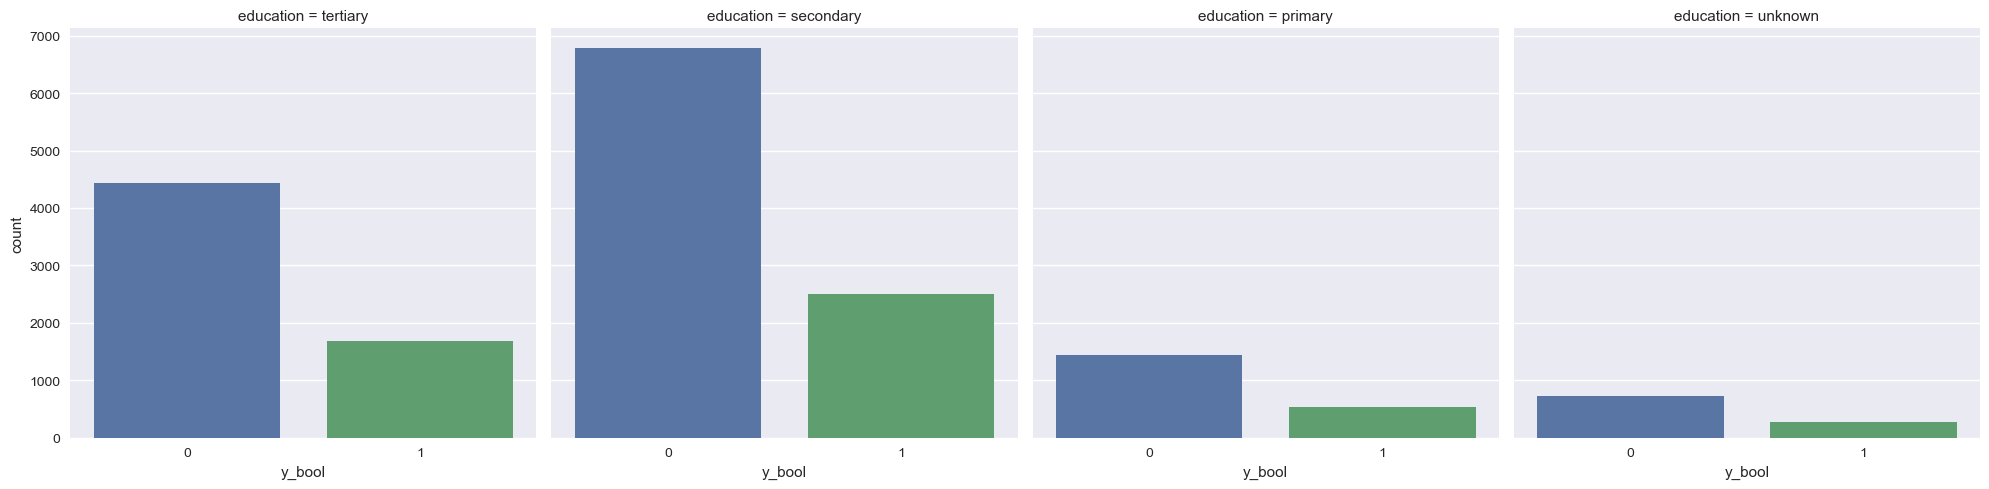

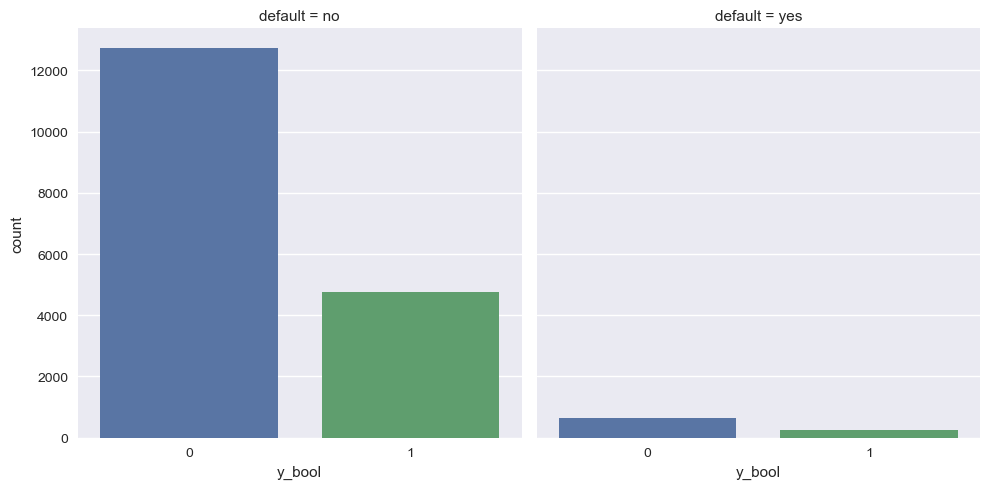

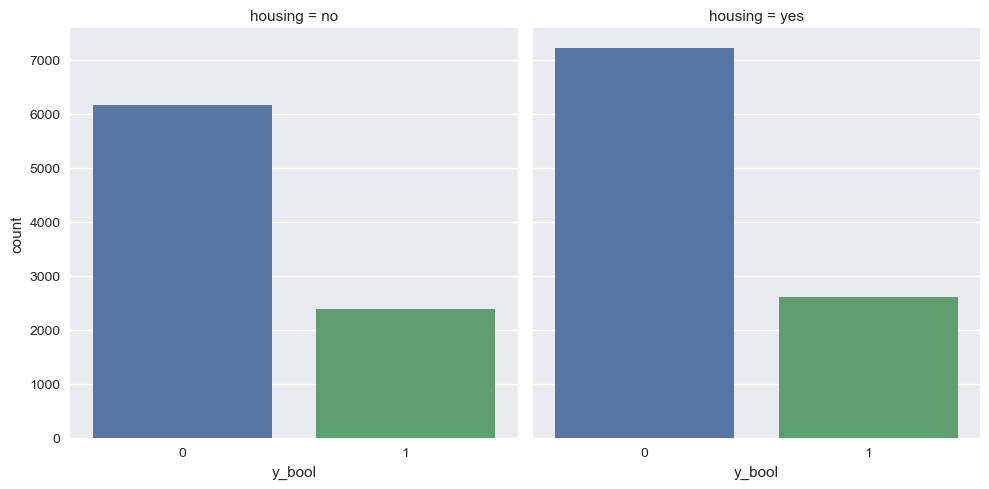

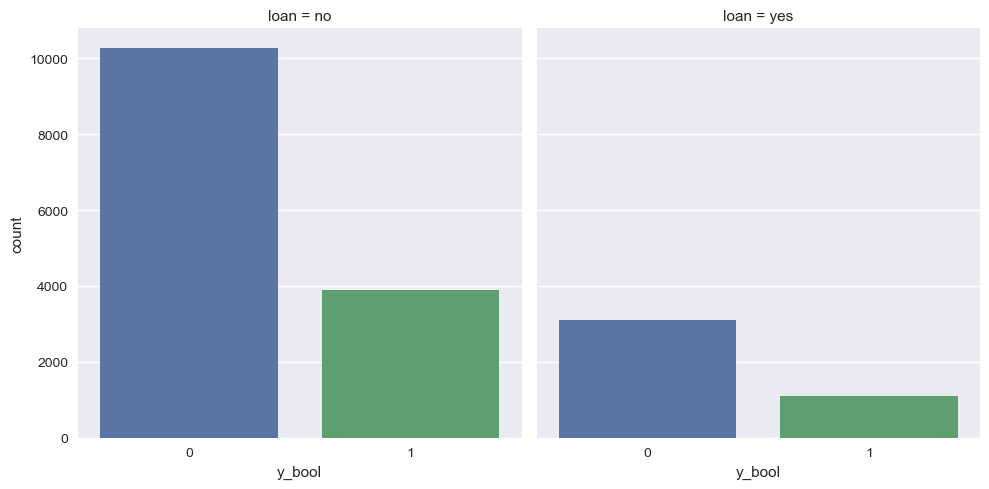

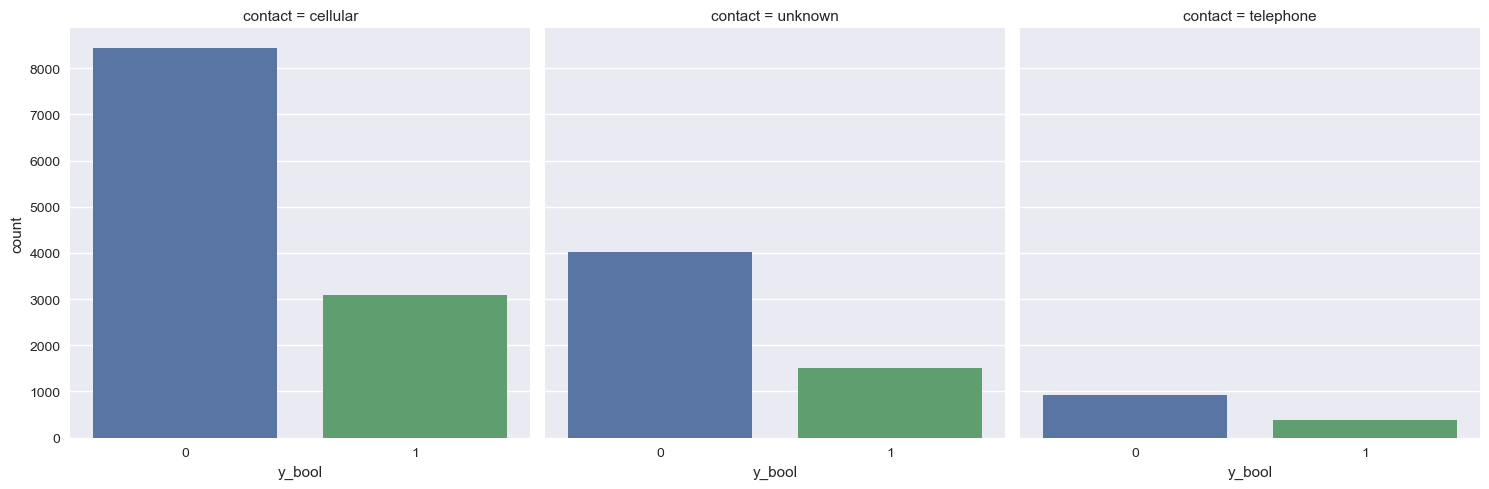

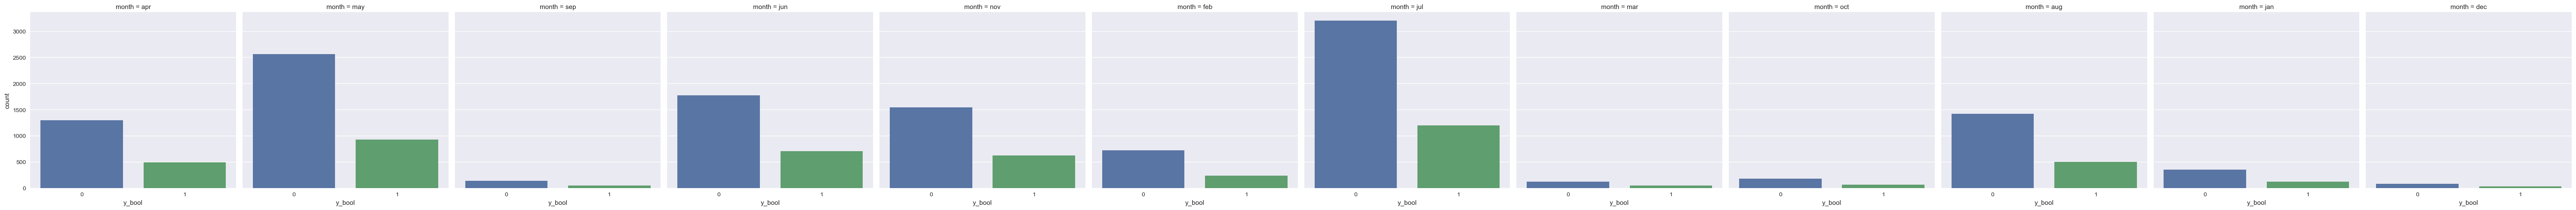

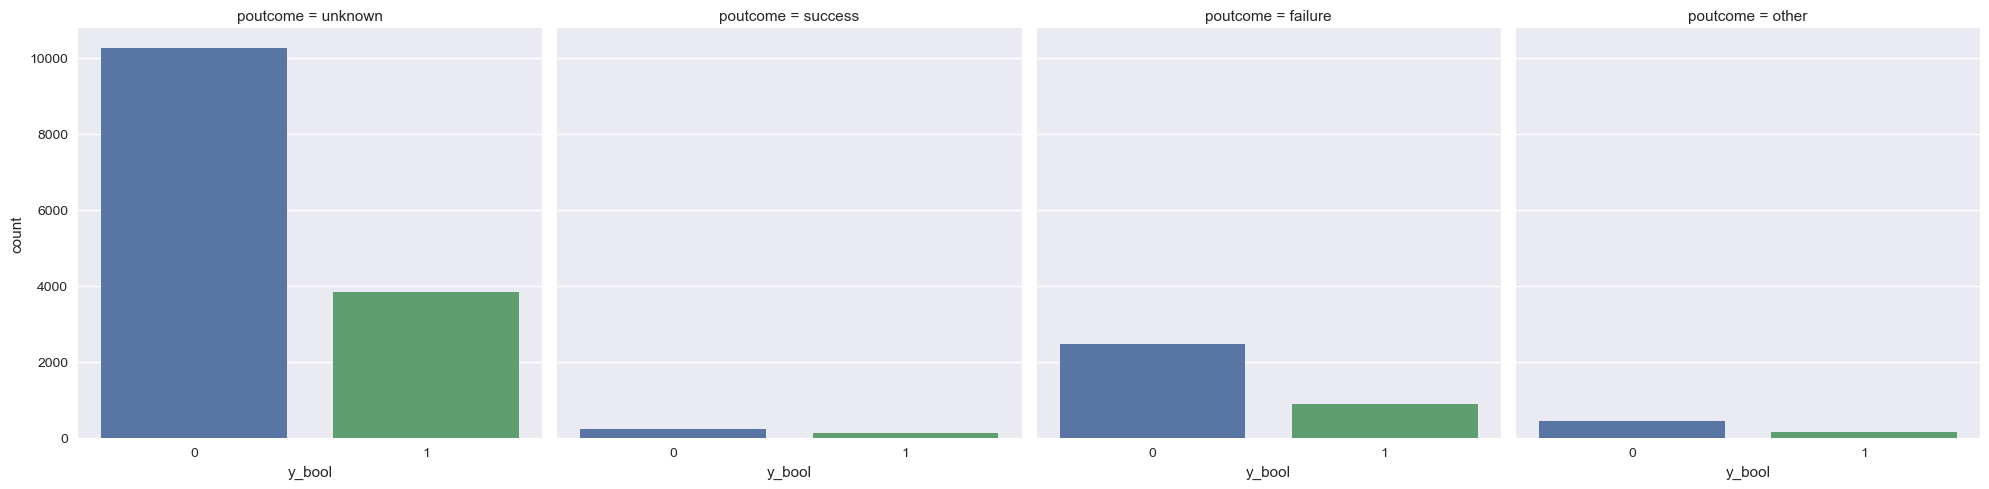

In [287]:
# Check target label split over categorical features
# Find out the relationship between categorical variable and dependent variable

for categorical_feature in df_cat:
    sns.catplot(x='y_bool', col=categorical_feature, kind='count', data= df)
plt.show()

**Inferences:**

***Job:*** Highest Number of application are from Blue collar,Technician,management and admin type of job.<br>
***Default:*** People who have no default have subscribed to plan.<br>
***Marital:*** Majority client subscribed were married.<br>
***Education:*** Client with university degree and high school were approached more as compare to other and they have higher success rate as well. (in terms of term deposit number)<br>
***Housing:*** Housing loan does not have much effect on the number of term deposit purchased.<br>
***Loan:*** We approach majority around client with not having personal loan.<br>
***Contact:*** Majority calls are from cellular.<br>
***Month:***  Majority people who have subscribed are from month may,june,july,nov.<br>
***poutcome:*** If a client took the term deposit last time than there is higher chances of that client subscribing to it again<br>

<a id='count_num'></a>
## 7.2 Numerical Features

In [288]:
df_num = df[['age','day','duration','balance','campaign','previous','pdays']]

<a id='count_num_plot'></a>
### 7.2.1 Plotting dist graph for numerical count

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

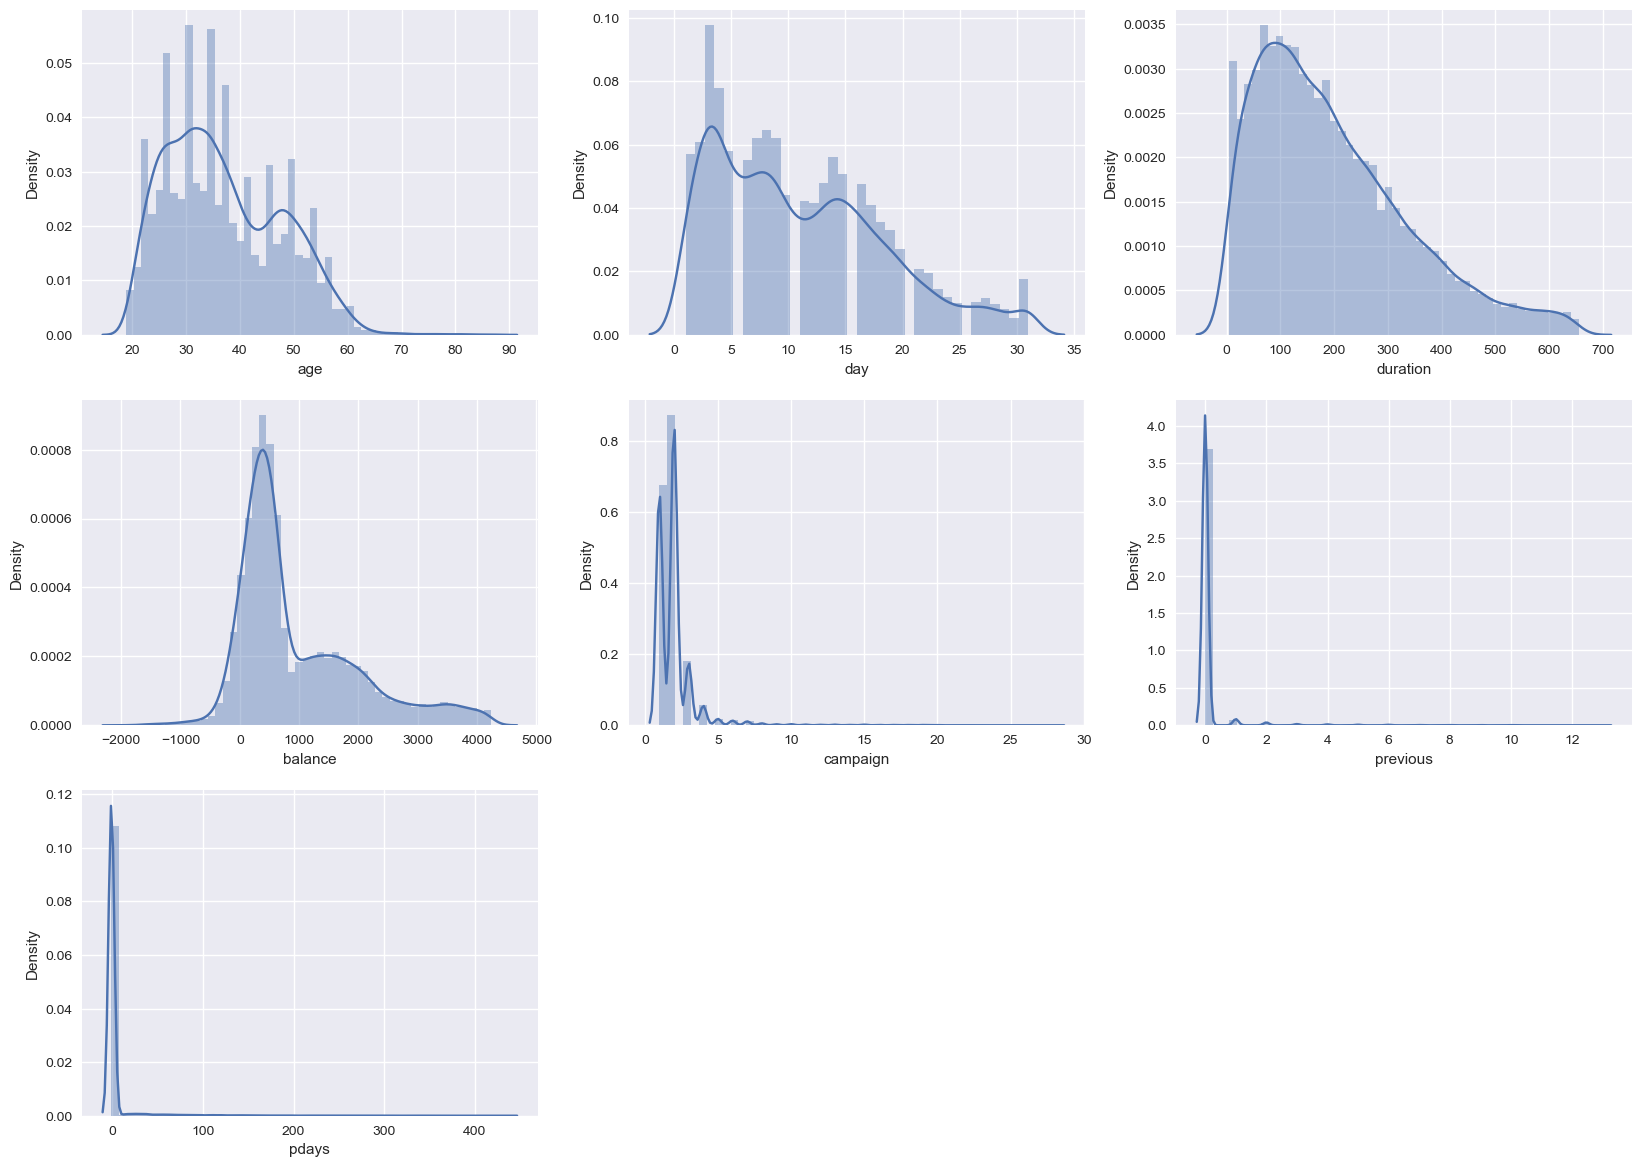

In [289]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in df_num:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

**Inference:**

It seems age, days distributed normally<br>
balance, duration, compaign, pdays and previous heavely skewed towards Right and seems to be have some outliers.

<a id='count_num_label'></a>
### 7.2.2 Relationship of Numerical Features with Label

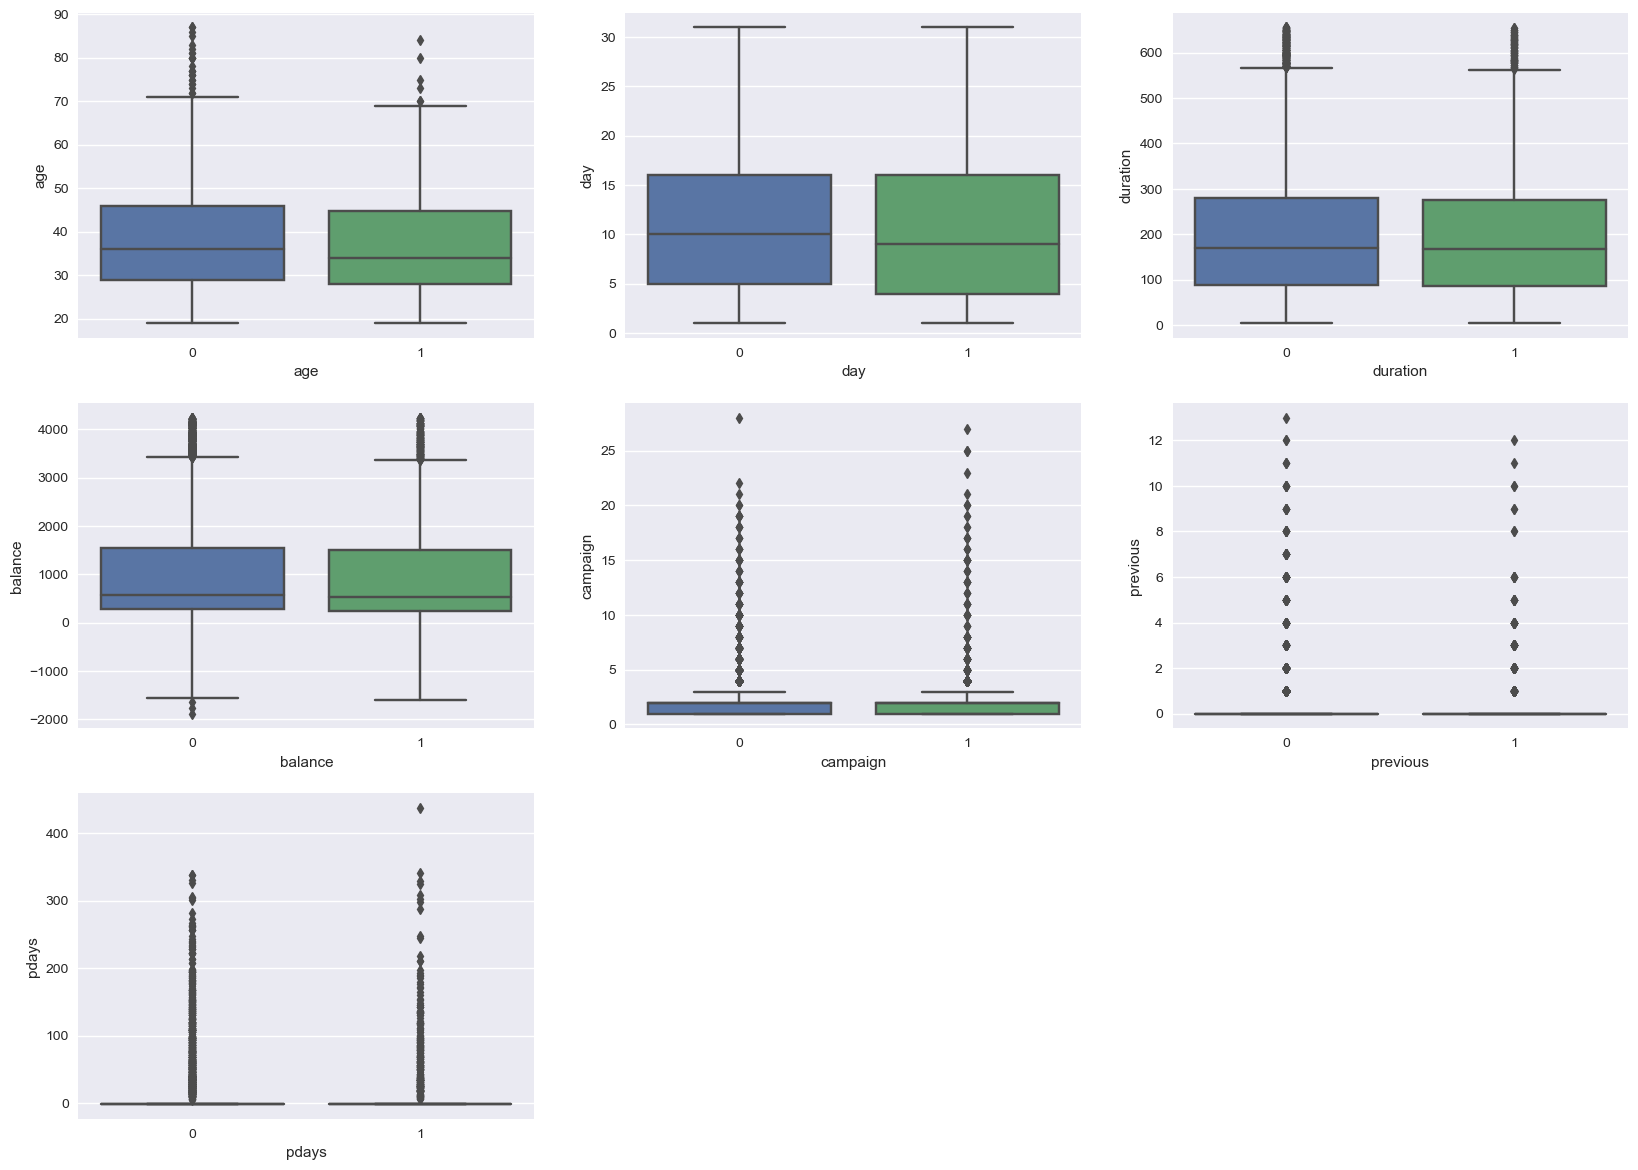

In [290]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in df_num:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y_bool", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

**Inferences:**

***Job:*** Highest Number of application are from Blue collar,Technician,management and admin type of job.<br>
***Default:*** People who have no default have subscribed to plan.<br>
***Marital:*** Majority client subscribed were married.<br>
***Education:*** Client with university degree and high school were approached more as compare to other and they have higher success rate as well. (in terms of term deposit number)<br>
***Housing:*** Housing loan does not have much effect on the number of term deposit purchased.<br>
***Loan:*** We approach majority around client with not having personal loan.<br>
***Contact:*** Majority calls are from cellular.<br>
***Month:***  Majority people who have subscribed are from month may,june,july,nov.<br>
***poutcome:*** If a client took the term deposit last time than there is higher chances of that client subscribing to it again<br>

<a id='label'></a>
## 7.3 Label (y)

In [291]:
df['y_bool'].value_counts()

0    13382
1     4986
Name: y_bool, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


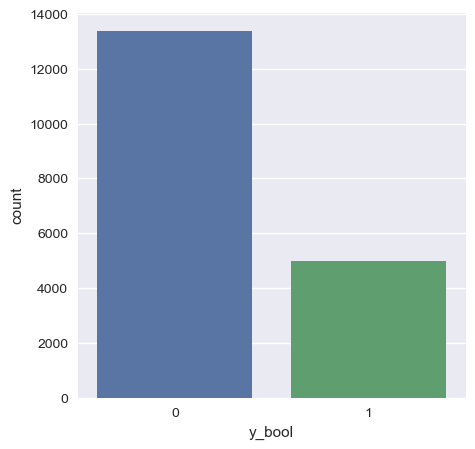

In [292]:
sns.countplot(df['y_bool']);

**Observation:**

Imbalanced dataset

<a id='age_analysis'></a>
# 8. Age analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


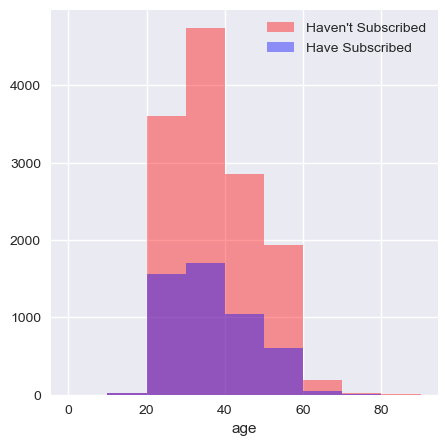

In [293]:
bins = range(0, 100, 10)
ax = sns.distplot(df.age[df.y_bool==0],
              color='red', kde=False, bins=bins, label="Haven't Subscribed")
sns.distplot(df.age[df.y_bool==1],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Have Subscribed")
plt.legend()
plt.show()

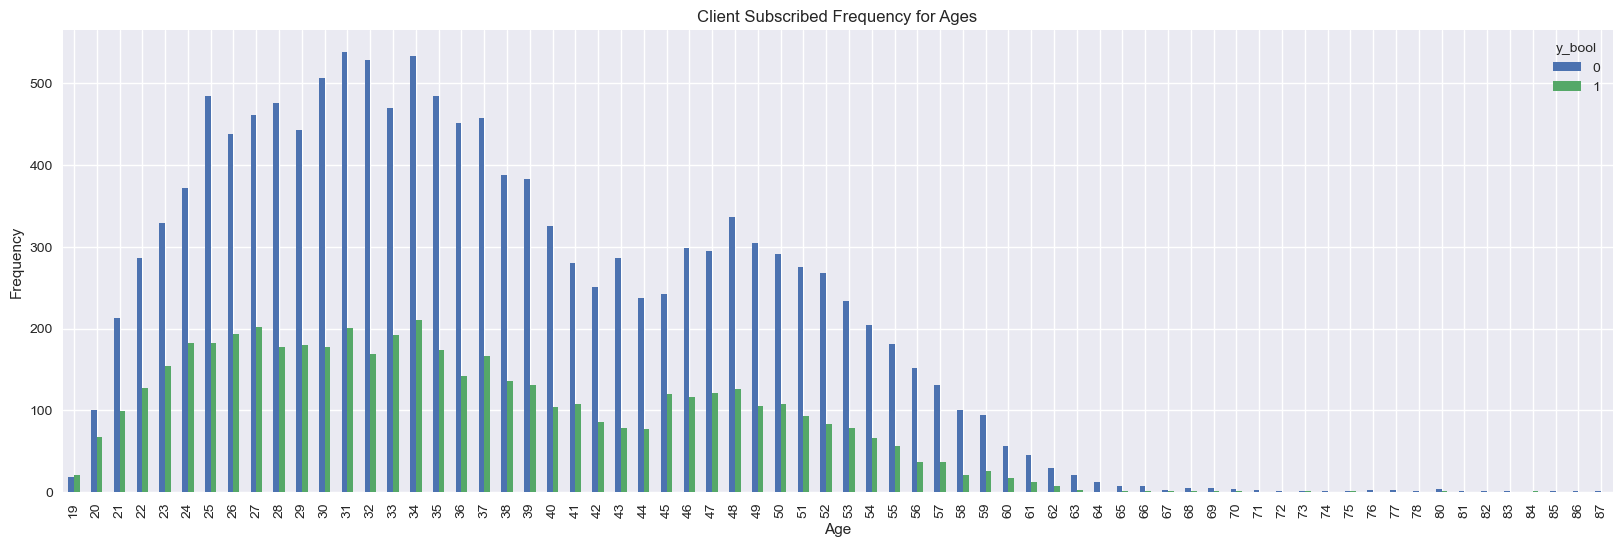

In [294]:
pd.crosstab(df.age,df.y_bool).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Observation:**

People who have subscribed to plan are from age of 20-60.

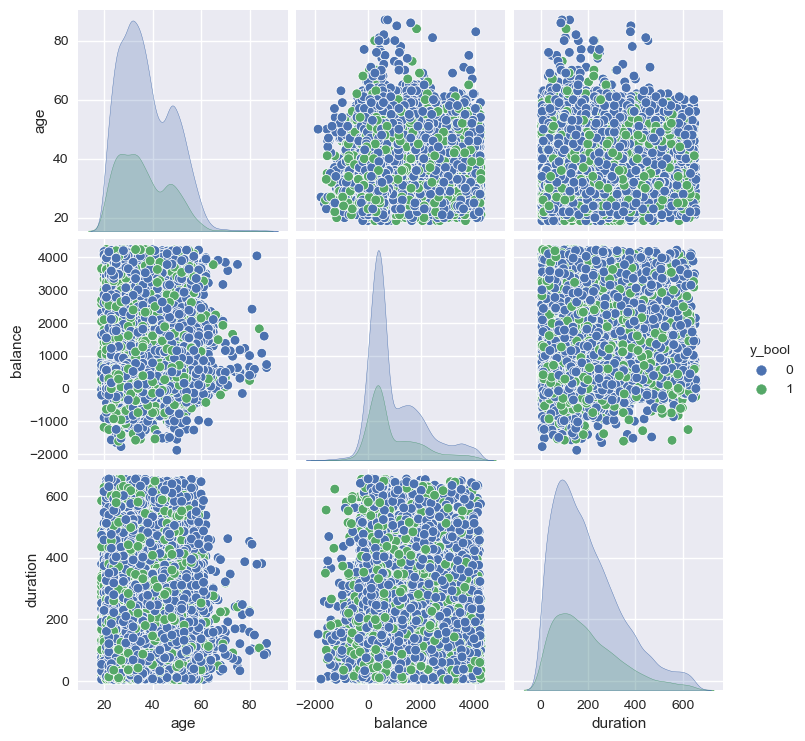

In [295]:
sns.pairplot(data=df, hue='y_bool', vars= ['age', 'balance', 'duration']);

<a id='encoding'></a>
# 9. Encoding

In [296]:
df = pd.get_dummies(df, columns=['job','marital','default','housing','loan','contact','month','poutcome'], drop_first=True)

In [297]:
df

,age,education,balance,day,duration,campaign,pdays,previous,y_bool,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,51,tertiary,148,15,263,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,65,tertiary,2197,12,102,2,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,36,secondary,1761,19,177,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,52,tertiary,1887,19,56,1,-1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,22,secondary,2456,16,539,4,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,26,secondary,289,8,102,3,-1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
18364,34,tertiary,122,19,301,2,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18365,32,tertiary,521,2,140,3,-1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
18366,40,secondary,2092,3,7,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [298]:
le = LabelEncoder()
df['education']= le.fit_transform(df['education'].values)

In [299]:
df

,age,education,balance,day,duration,campaign,pdays,previous,y_bool,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,51,2,148,15,263,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,65,2,2197,12,102,2,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,36,1,1761,19,177,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,52,2,1887,19,56,1,-1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,22,1,2456,16,539,4,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,26,1,289,8,102,3,-1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
18364,34,2,122,19,301,2,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18365,32,2,521,2,140,3,-1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
18366,40,1,2092,3,7,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<a id='scaling_dataset'></a>
# 10. Scaling Dataset

In [300]:
scaler = MinMaxScaler()

In [301]:
df[['age','day','duration','balance','campaign','previous','pdays']] = scaler.fit_transform(df[['age','day','duration','balance','campaign','previous','pdays']].to_numpy())

In [302]:
df

,age,education,balance,day,duration,campaign,pdays,previous,y_bool,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.470588,2,0.331099,0.466667,0.397239,0.037037,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.676471,2,0.666122,0.366667,0.150307,0.037037,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0.250000,1,0.594833,0.600000,0.265337,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.485294,2,0.615435,0.600000,0.079755,0.000000,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0.044118,1,0.708470,0.500000,0.820552,0.111111,0.0,0.0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,0.102941,1,0.354153,0.233333,0.150307,0.074074,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,1
18364,0.220588,2,0.326848,0.600000,0.455521,0.037037,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
18365,0.191176,2,0.392086,0.033333,0.208589,0.074074,0.0,0.0,0,1,...,0,0,0,0,0,1,0,0,0,1
18366,0.308824,1,0.648954,0.066667,0.004601,0.037037,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


<a id='train_test_split'></a>
# 11. Splitting Train and Test Data

In [303]:
X = df.drop(['y_bool'],axis = 1)

In [304]:
X

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.470588,2,0.331099,0.466667,0.397239,0.037037,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.676471,2,0.666122,0.366667,0.150307,0.037037,0.0,0.0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0.250000,1,0.594833,0.600000,0.265337,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.485294,2,0.615435,0.600000,0.079755,0.000000,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.044118,1,0.708470,0.500000,0.820552,0.111111,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,0.102941,1,0.354153,0.233333,0.150307,0.074074,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
18364,0.220588,2,0.326848,0.600000,0.455521,0.037037,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
18365,0.191176,2,0.392086,0.033333,0.208589,0.074074,0.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
18366,0.308824,1,0.648954,0.066667,0.004601,0.037037,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [305]:
y = df['y_bool']

In [306]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3 , random_state = 42)

<a id='fit_models'></a>
# 12. Fitting Classification Models

<a id='fit_model_knn'></a>
## 12.1 KNN 

In [307]:
Knn_model = KNeighborsClassifier(n_neighbors= 5)

In [308]:
Knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [309]:
knntrain_pred = Knn_model.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [310]:
f1_score(y_train,knntrain_pred)

0.42924439419634447

In [311]:
# test data 
knntest_pred = Knn_model.predict(X_test)
f1_score(y_test,knntest_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.19086757990867578

<a id='knn_cm_train'></a>
### 12.1.1 Confusion matrix for train data

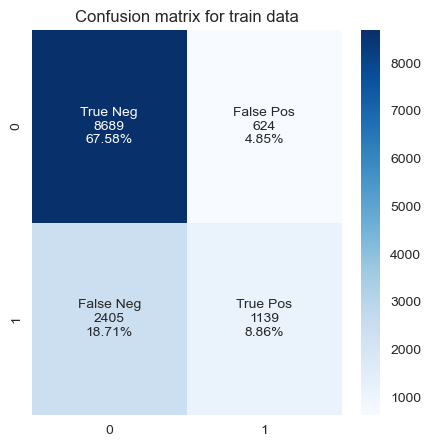

In [312]:
cf_matrix = confusion_matrix(y_train,knntrain_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for train data')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

<a id='knn_cm_test'></a>
### 12.1.2 Confusion matrix for test data

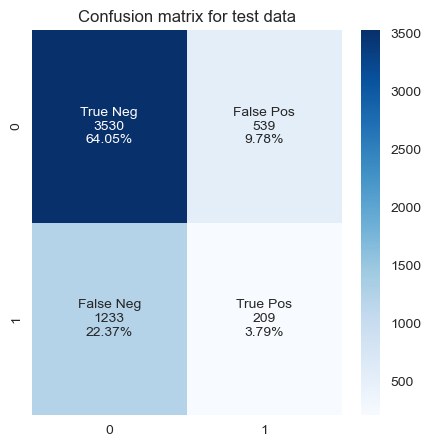

In [313]:
cf_matrix = confusion_matrix(y_test,knntest_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for test data')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');### 12.1.1 Confusion matrix for train data

<a id='fit_model_log_reg'></a>
## 12.2 Logistic Regression

In [314]:
modelLogistic = LogisticRegression(C=1,class_weight={0:1,1:2.0})
modelLogistic.fit(X_train,y_train)
#print the regression coefficients

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient are = ", modelLogistic.coef_)

The intercept b0=  [-0.05104888]
The coefficient are =  [[-7.59796264e-01 -7.52567935e-04 -6.53339236e-02 -9.76323073e-02
  -5.62538677e-02  8.74586533e-01 -2.78642144e-01 -2.19888895e-01
   1.22663202e-01  7.37153129e-02  3.07865593e-01  1.29387957e-01
   5.55316258e-03  3.07226031e-01 -1.84385819e-02  1.53178316e-01
   1.38343796e-03  1.85566328e-01 -7.41206941e-02  2.10733324e-03
  -7.55443576e-02 -1.44922256e-02 -8.38799756e-02 -4.32069538e-02
   1.37372984e-01  3.33269894e-02 -1.53883130e-01 -1.52672346e-01
  -1.75711251e-01 -9.66404334e-02  1.16690029e-02  6.98747714e-02
  -1.91429400e-01 -9.59041670e-02  5.27064455e-02 -1.74795488e-01
  -1.45902006e-01  6.91953284e-02  2.15476927e-01  4.43794821e-02]]


In [315]:
y_pred_train= modelLogistic.predict(X_train)

In [316]:
y_pred_test= modelLogistic.predict(X_test)

In [317]:
y_pred_train.shape

(12857,)

In [318]:
y_pred_test.shape

(5511,)

In [319]:
f1_score(y_train,y_pred_train)

0.1284320399364647

In [320]:
f1_score(y_test,y_pred_test)

0.11945205479452053

<a id='log_reg_cm_train'></a>
### 12.2.1 Confusion matrix for train data

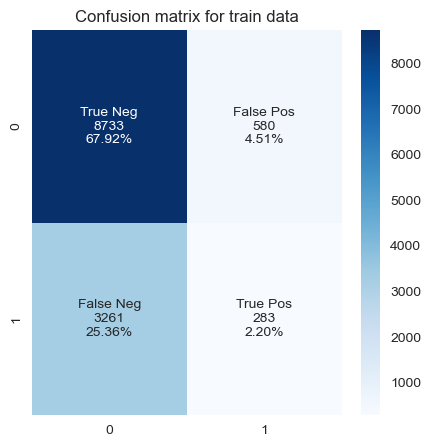

In [321]:
cf_matrix = confusion_matrix(y_train,y_pred_train)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for train data')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

<a id='log_reg_cm_test'></a>
### 12.2.2 Confusion matrix for test data

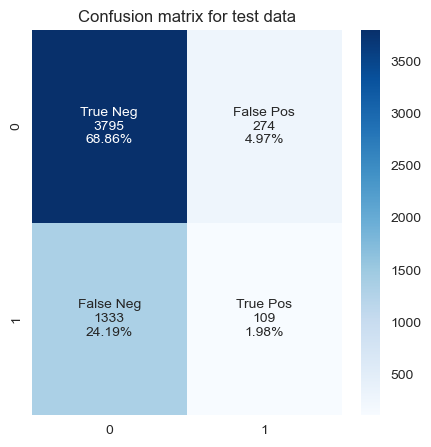

In [322]:
cf_matrix = confusion_matrix(y_test,y_pred_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for test data')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

<a id='fit_model_dec_tree'></a>
## 12.3 Decision Tree

In [323]:
dt = DecisionTreeClassifier(max_depth=20,class_weight= {0:1,1:2.2})
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 2.2}, max_depth=20)

In [324]:
preddt_train = dt.predict(X_train)

In [325]:
preddt_test = dt.predict(X_test)

In [326]:
f1_score(y_train,preddt_train)

0.8498819608387723

In [327]:
f1_score(y_test,preddt_test)

0.27643908969210174

<a id='dec_tree_cm_train'></a>
### 12.3.1 Confusion matrix for train data

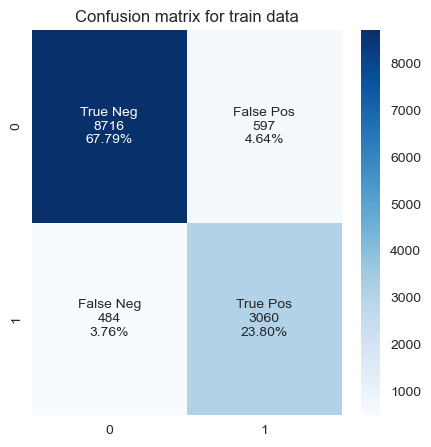

In [328]:
cf_matrix = confusion_matrix(y_train,preddt_train)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for train data')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

<a id='dec_tree_cm_test'></a>
### 12.3.2 Confusion matrix for test data

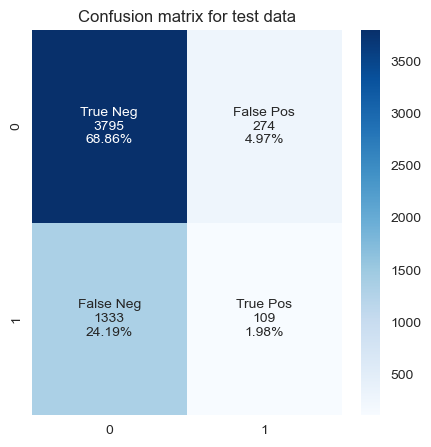

In [329]:
cf_matrix = confusion_matrix(y_test,y_pred_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for test data')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

<a id='auc'></a>
# 13. AUC scores

In [330]:
auc_knn = roc_auc_score(y_test, knntest_pred)
auc_log_reg = roc_auc_score(y_test, y_pred_test)
auc_dec_tree = roc_auc_score(y_test, preddt_test)

In [331]:
models = pd.DataFrame({
    'Model' : ['K Nearest Neighbour', 'Logistic Regression', 'Decision Tree'],
    'AUC Score' : [auc_knn, auc_log_reg, auc_dec_tree]
})

models

,Model,AUC Score
0,K Nearest Neighbour,0.506236
1,Logistic Regression,0.504126
2,Decision Tree,0.503980


<a id='roc'></a>
# 14. ROC curve for models

In [332]:
fpr1, tpr1, thresh1 = roc_curve(y_test, knntest_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_test, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, preddt_test, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

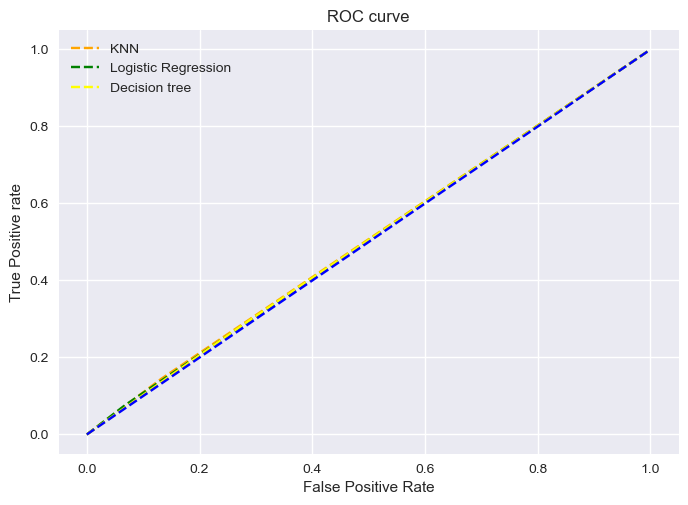

In [333]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Decision tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

<a id='cv'></a>
# 15. Cross Validation

<a id='cv_log_reg'></a>
## 15.1 Logistic Regression

In [334]:
# Create logistic regression model
logreg = LogisticRegression(C=1,class_weight={0:1,1:1.1})

# Perform cross-validation on the training data
scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5)

# Print the F1 scores for each fold in the training data
print("Training F1 Scores:", scores)

# Print the mean F1 score and standard deviation of the training data
print("Mean Training F1 Score:", scores.mean())
print("Training Standard Deviation:", scores.std())

# Train the logistic regression model on the entire training data
logreg.fit(X_train, y_train)

# Evaluate the model on the test data
test_f1_score = logreg.score(X_test, y_test)
print("Test F1 Score:", test_f1_score)
cv_logtest = logreg.predict(X_test)
print(cv_logtest)

Training F1 Scores: [0.         0.         0.         0.         0.00280505]
Mean Training F1 Score: 0.0005610098176718093
Training Standard Deviation: 0.0011220196353436186
Test F1 Score: 0.7383414988205408
[0 0 0 ... 0 0 0]


In [335]:
auc_log_reg_cv = roc_auc_score(y_test,cv_logtest)
print(auc_log_reg_cv)

0.5


<a id='cv_dec_tree'></a>
## 15.2 Decision tree

In [336]:
# Create decision tree classifier
dt2 = DecisionTreeClassifier(max_depth=25,class_weight= {0:1,1:2.2})

# Perform cross-validation on the training data
cv_scores = cross_val_score(dt2, X_train, y_train, scoring='f1', cv=15)

# Print the F1 scores for each fold in the training data
print("Training F1 Scores:", cv_scores)

# Print the mean F1 score and standard deviation of the training data
print("Mean Training F1 Score:", cv_scores.mean())
print("Training Standard Deviation:", cv_scores.std())

# Train the decision tree on the entire training data
dt2.fit(X_train, y_train)

# Evaluate the model on the test data
test_f1_score = dt.score(X_test, y_test)
print("Test F1 Score:", test_f1_score)

Training F1 Scores: [0.34730539 0.34086242 0.30290456 0.33264887 0.32510288 0.37848606
 0.30416667 0.32231405 0.28740157 0.31055901 0.26349892 0.31967213
 0.30831643 0.2892057  0.31923077]
Mean Training F1 Score: 0.31677836226714357
Training Standard Deviation: 0.026595427490290174
Test F1 Score: 0.6076937035020867


<a id='feat_select'></a>
# 16. Feature selection

<a id='feat_select_log_reg'></a>
## 16.1 Logistic Regression

In [337]:
model1 = LogisticRegression()
# Create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(estimator=model1, k_features='best', forward=True, verbose=2, scoring='f1')

In [338]:
X.columns

Index(['age', 'education', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [339]:
feature_names = ['age', 'education', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown']

In [340]:
feature_names

['age',
 'education',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [341]:
# Perform feature selection
sfs.fit(X, y)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

# Transform the training and testing data to keep only the selected features
X_train_selected = sfs.transform(X)
X_test_selected = sfs.transform(X)

# Train a linear regression model on the selected features
model1.fit(X_train_selected, y)

# Evaluate the model on the testing data
score = model1.score(X_test_selected, y)

# Print the selected features and the model score
print("Selected Features:", selected_feature_names)
print("Model Score:", score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.8s finished

[2023-09-07 19:41:39] Features: 1/40 -- score: 0.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    6.3s finished

[2023-09-07 19:41:45] Features: 2/40 -- score: 0.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    7.3s finished

[2023-09-07 19:41:53] Features: 3/40 -- score: 0.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   11.0s finished

[2023-09-07 19:49:19] Features: 29/40 -- score: 0.0004008016032064129[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   10.0s finished

[2023-09-07 19:49:30] Features: 30/40 -- score: 0.0004008016032064129[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.2s finished

[2023-09-07 19:49:40] Features: 31/40 -- score: 0.0004008016032064129[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=

Selected Features: ['age', 'education', 'balance', 'day', 'duration', 'campaign', 'job_entrepreneur']
Model Score: 0.7285496515679443


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished

[2023-09-07 19:50:23] Features: 40/40 -- score: 0.0

<a id='feat_select_dec_tree'></a>
## 16.2 Decision Tree

In [342]:
model2 = DecisionTreeClassifier(max_depth=15)
sfs2 = SequentialFeatureSelector(estimator=model2, k_features='best', forward=True, verbose=2, scoring='f1')

In [343]:
# Perform feature selection
sfs2.fit(X, y)

# Get the selected feature indices
selected_feature_indices = sfs2.k_feature_idx_

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

# Transform the training and testing data to keep only the selected features
X_train_selected = sfs2.transform(X)
X_test_selected = sfs2.transform(X)

# Train a linear regression model on the selected features
model2.fit(X_train_selected, y)

# Evaluate the model on the testing data
score1 = model2.score(X_test_selected, y)

# Print the selected features and the model score
print("Selected Features:", selected_feature_names)
print("Model Score:", score1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.2s finished

[2023-09-07 19:50:24] Features: 1/40 -- score: 0.046361415533595456[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    5.2s finished

[2023-09-07 19:50:29] Features: 2/40 -- score: 0.11588958409349503[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    6.2s finished

[2023-09-07 19:50:36] Features: 3/40 -- score: 0.1357373095745022[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    5.4s finished

[2023-09-07 19:53:21] Features: 28/40 -- score: 0.17892302892121262[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.0s finished

[2023-09-07 19:53:26] Features: 29/40 -- score: 0.17942859861910393[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    4.7s finished

[2023-09-07 19:53:30] Features: 30/40 -- score: 0.17725015854557594[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.5s finished

[2023-09-07 19:53:35] Features: 

Selected Features: ['age', 'education', 'balance', 'day', 'campaign', 'job_blue-collar', 'job_management', 'job_retired', 'job_services', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'housing_yes', 'loan_yes', 'contact_telephone', 'month_feb', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_unknown']
Model Score: 0.8062391114982579


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished

[2023-09-07 19:53:58] Features: 40/40 -- score: 0.16069317517192774

<a id='inference'></a>
# 17. Inference